In [ ]:
#! pip install tpot

In [ ]:
from tpot import TPOTClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Airline-Passenger-Satisfaction-Prediction-Part2/Dev/Data/Airline_Data_by_model.csv'
df = pd.read_csv(url)

In [ ]:
df

,Age,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,...,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction,Gender_Male,Customer_Type_Loyal Customer,Type_of_Travel_Business travel
0,-1.183380,0.0,-0.172094,2.0,2.0,2.0,2.0,5.0,5.0,5.0,...,3.0,4.0,4.0,4.0,5.0,-0.455349,1.0,0.0,1.0,1.0
1,1.474051,0.0,-1.083340,3.0,3.0,3.0,3.0,4.0,5.0,5.0,...,4.0,4.0,3.0,3.0,3.0,-0.455349,1.0,1.0,1.0,1.0
2,0.411079,2.0,-0.040514,2.0,4.0,2.0,3.0,2.0,2.0,2.0,...,3.0,4.0,3.0,5.0,2.0,0.161346,0.0,1.0,1.0,0.0
3,0.790712,0.0,0.704783,4.0,3.0,4.0,4.0,5.0,5.0,5.0,...,5.0,5.0,4.0,5.0,4.0,-0.181262,1.0,0.0,1.0,1.0
4,-1.638940,2.0,-0.251632,3.0,3.0,3.0,4.0,2.0,3.0,3.0,...,3.0,4.0,4.0,3.0,2.0,-0.455349,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43751,-1.183380,0.0,-0.594331,4.0,4.0,4.0,4.0,5.0,5.0,5.0,...,4.0,4.0,3.0,4.0,5.0,0.709520,1.0,1.0,1.0,1.0
43752,1.170345,2.0,-0.442129,4.0,5.0,5.0,5.0,4.0,4.0,4.0,...,4.0,3.0,1.0,3.0,4.0,-0.455349,0.0,1.0,1.0,1.0
43753,1.398124,0.0,0.276655,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,4.0,4.0,4.0,4.0,4.0,0.161346,1.0,0.0,1.0,1.0
43754,0.638858,2.0,0.297276,3.0,1.0,3.0,4.0,2.0,3.0,2.0,...,3.0,4.0,2.0,4.0,2.0,-0.455349,0.0,1.0,1.0,0.0


In [ ]:
# Dependent and Independent variables
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

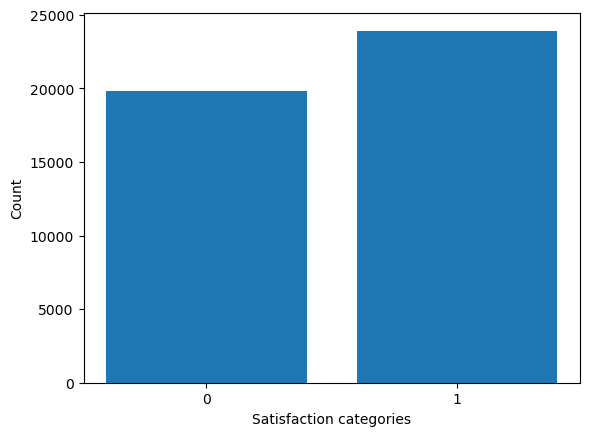

In [ ]:
# To select the best scoring metric for TPOTClassifier, first we need to check how balanced is our data.
# In this case a value of 1 means a satisfied client, 0 disatisffied
category_counts = df['satisfaction'].value_counts()
plt.bar(category_counts.index, category_counts.values)

# Set the x-axis and y-axis labels
plt.xlabel('Satisfaction categories')
plt.ylabel('Count')

# Set the x-axis ticks
plt.xticks([0, 1], ['0', '1'])
plt.show()

In [ ]:
# In this case, we will select F1 score since we want to balance the relevance of precision and recall

In [ ]:
tpot = TPOTClassifier(generations=25, population_size=50, max_time_mins = 180 , verbosity=2, scoring='f1')

In [ ]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.979424971062242

Generation 2 - Current best internal CV score: 0.979424971062242

Generation 3 - Current best internal CV score: 0.979424971062242

Generation 4 - Current best internal CV score: 0.979424971062242

Generation 5 - Current best internal CV score: 0.9794675211450528

Generation 6 - Current best internal CV score: 0.9796808796499425

Generation 7 - Current best internal CV score: 0.9796808796499425

182.74 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(PolynomialFeatures(MinMaxScaler(input_matrix), degree=2, include_bias=False, interaction_only=False), bootstrap=False, criterion=entropy, max_features=0.6000000000000001, min_samples_leaf=3, min_samples_split=13, n_estimators=100)


TPOTClassifier(generations=25, max_time_mins=180, population_size=50,
               scoring='f1', verbosity=2)

In [ ]:
print(tpot.score(X_val, y_val))

0.9800443458980045


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(
